# $Log Activity$ #
1) when did it exactly happen?

2) Could you see it slowing down? What were the variables that showed the slowing down (was it overall price, amount sold vs unsold, change in more rentals sold and less housing, changes in which CouncilArea or Region, more houses sold in distances further away from Melbourne CBD and less closer)?

3) Could you have predicted it (I'm not sure how you would do this, but I'm sure you magicians have a way that would make me think we should burn you for being a witch) 

4) Should I hold off even longer in buying a two bedroom apartment in Northcote? <-- This is the real reason for me in publishing this dataset :)

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#**METHOD GLOSSARIUM**

---



> VB (Vendor Bid): 
A bid made by the auctioneer on behalf of the vendor. It's not an actual bid to buy the property; rather, it's a public statement that the seller is not happy with the amount of the last bid, and is used to keep the bidding moving forward.

> PI (Passed In): The bidding has not reached the vendor’s reserve price (the minimum price that they’re prepared to sell at). The vendor is opting not to sell the property for the highest bid that was achieved at auction. A property can be passed in on either a bid from the crowd or a vendor bid.

> SP (Sold Prior): Selling prior to auction usually happens when there is only one buyer, or one buyer who has established themselves as superior to the rest of the competition. There are generally two types of offers before auction:
One is someone who makes a cheeky offer that is well below their maximum price to see if the owner will bite.
The other, which is less common, is a buyer who makes a strong offer before auction, under the proviso that they will walk away if the vendor doesn’t accept it.

> SA (Sold After): If a property fails to meet its reserve it will be classified as unsold, however it will still generally be available for sale after the auction, usually at the reserve price. The main advantage of buying unsold property after auction is that the auctioneer will generally disclose the reserve price.

> S (Property Sold): when a seller accepts an offer from a buyer and the title transfers to the new owners.

> PN (Sold Prior Not Disclosed): property sold before auction without price disclosure from seller

> SS (sold after auction price not disclosed)

> SN (sold not disclosed)

> W (withdrawn prior to auction)










# IMPORT DATA

In [ ]:
df = pd.read_csv('/content/Melbourne_housing_FULL.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.shape

(34857, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
cat = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date',
       'CouncilArea', 'Regionname']
num = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount']

In [ ]:
df[cat].describe()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


In [ ]:
df[num].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [ ]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', nan], dtype=object)

# **VISUALIZATION**

(0.0, 6000000.0)

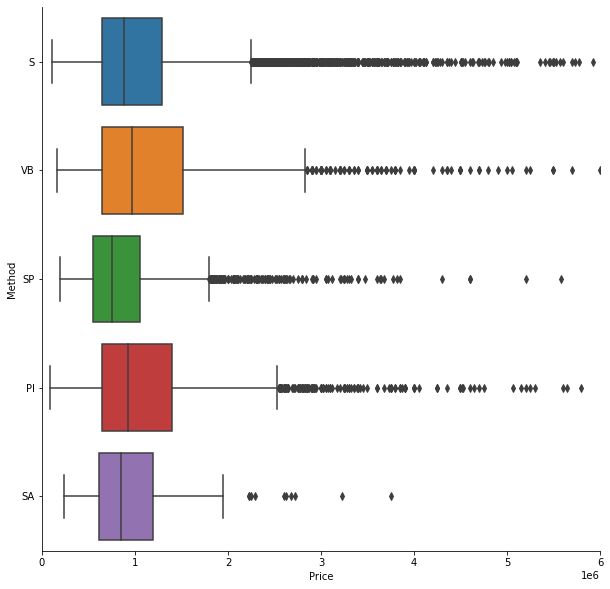

In [ ]:
# FIGURE 1
plt.figure(figsize=(10,10))
img = sns.boxplot(x='Price', y='Method', data=df[
                                                       (df['Method'] != 'SN')
                                                       &
                                                       (df['Method'] != 'SS')
                                                       &
                                                       (df['Method'] != 'W')
                                                       &
                                                       (df['Method'] != 'PN')
                                                       ]
            )
sns.despine()
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
img.set_xlim(0, 6000000)

In [ ]:
hold1 = []
dv = df[
                                                       (df['Method'] != 'SN')
                                                       &
                                                       (df['Method'] != 'SS')
                                                       &
                                                       (df['Method'] != 'W')
                                                       &
                                                       (df['Method'] != 'PN')
                                                       ]
rg = sorted(df['Method'].dropna().unique())
print(rg)
for i in rg:
  print("Method" , i
        , ", Median Price:" , dv['Price'].loc[dv['Method'] == i].median())
  hold1.append(dv['Price'].loc[dv['Method'] == i].median())

['PI', 'PN', 'S', 'SA', 'SN', 'SP', 'SS', 'VB', 'W']
Method PI , Median Price: 920000.0
Method PN , Median Price: nan
Method S , Median Price: 881000.0
Method SA , Median Price: 850000.0
Method SN , Median Price: nan
Method SP , Median Price: 751000.0
Method SS , Median Price: nan
Method VB , Median Price: 970000.0
Method W , Median Price: nan


In [ ]:
df[df['Method'] == "PN"].count()

Suburb           308
Address          308
Rooms            308
Type             308
Price              0
Method           308
SellerG          308
Date             308
Distance         308
Postcode         308
Bedroom2         229
Bathroom         229
Car              227
Landsize         202
BuildingArea     136
YearBuilt        146
CouncilArea      308
Lattitude        230
Longtitude       230
Regionname       308
Propertycount    308
dtype: int64

In [ ]:
index = df.index[df['Price'].isnull()]
dfv = df.drop(index, inplace=False)

In [ ]:
dfv[dfv['Method'] == "W"].isna().sum()

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

In [ ]:
for i in ['PI', 'S', 'SA', 'SP', 'VB']:
  print(i, ":")
  print(dfv[dfv['Method'] == i].count())
  print()

PI :
Suburb           3255
Address          3255
Rooms            3255
Type             3255
Price            3255
Method           3255
SellerG          3255
Date             3255
Distance         3255
Postcode         3255
Bedroom2         2408
Bathroom         2408
Car              2349
Landsize         2127
BuildingArea     1270
YearBuilt        1444
CouncilArea      3255
Lattitude        2429
Longtitude       2429
Regionname       3255
Propertycount    3255
dtype: int64

S :
Suburb           17515
Address          17515
Rooms            17515
Type             17515
Price            17515
Method           17515
SellerG          17515
Date             17515
Distance         17515
Postcode         17515
Bedroom2         13583
Bathroom         13578
Car              13357
Landsize         11720
BuildingArea      6741
YearBuilt         7655
CouncilArea      17514
Lattitude        13696
Longtitude       13696
Regionname       17514
Propertycount    17514
dtype: int64

SA :
Suburb       

In [ ]:
dfv = df.copy()

In [ ]:
dfv.loc[dfv.Method == 'PN', "Method"] = "No"
dfv.loc[dfv.Method == 'SN', "Method"] = "No"
dfv.loc[dfv.Method == 'SS', "Method"] = "No"
dfv.loc[dfv.Method == 'W', "Method"] = "No"

**Figure 1**: House bought method and price bought



*   By method, house sold via Vendor Bid (VB) and Passed In (PI) have the highest median of price. This make sense since the purpose is to keep biding price higher.
*   This happen when the buyers and acutioneer price does not meet - only 5% cases are recorded in the data.

***To trully analyze housing sold, then houses sold with this method will be excluded.***

Method S, Method SA, Method SP


In [ ]:
dfv = dfv[
                                                       (dfv['Method'] != 'SN')
                                                       &
                                                       (dfv['Method'] != 'SS')
                                                       &
                                                       (dfv['Method'] != 'W')
                                                       &
                                                       (dfv['Method'] != 'PN')
                                                       &
                                                       (dfv['Method'] != 'VB')
                                                       &
                                                       (dfv['Method'] != 'PI')
                                                       ]

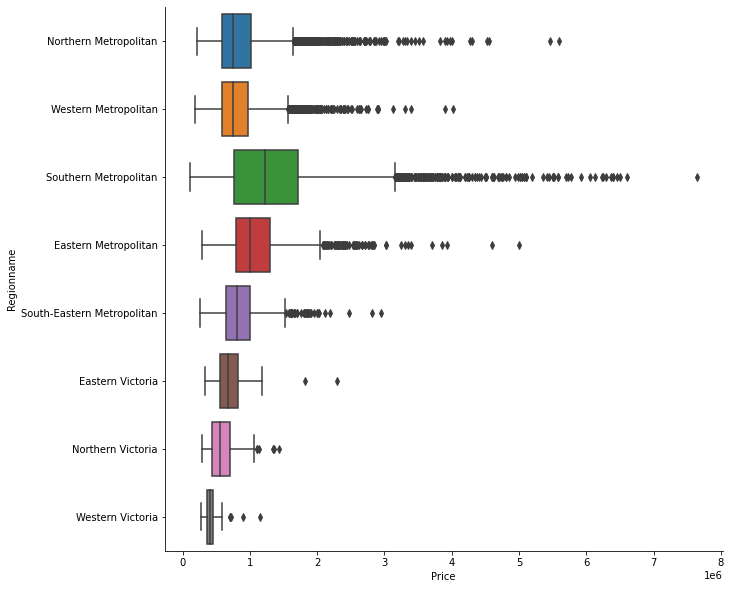

In [ ]:
# FIGURE 2
plt.figure(figsize=(10,10))
sns.boxplot(x='Price', y='Regionname', data=dfv
            )
sns.despine()

In [ ]:
hold1 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Regionname" , i
        , ", Average Price:" , dfv['Price'].loc[dfv['Regionname'] == i].mean())
  hold1.append(dfv['Price'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Regionname Eastern Metropolitan , Average Price: 1094303.593180016
Regionname Eastern Victoria , Average Price: 709349.8714285714
Regionname Northern Metropolitan , Average Price: 861678.7453271028
Regionname Northern Victoria , Average Price: 604916.6666666666
Regionname South-Eastern Metropolitan , Average Price: 862867.1101398602
Regionname Southern Metropolitan , Average Price: 1361200.6581532417
Regionname Western Metropolitan , Average Price: 833958.6304669343
Regionname Western Victoria , Average Price: 432250.0


**Figure 2**: region and price sold

*   All the Metropolitan region have high prices compare to regions outside the Metropolitan area - Southern Metropolitan has the highest median price out of all region (1225000), with Eastern Metropolitan coming in second (1001000).
*   The high price houses seems reasonable since they are in Metropolitan area.



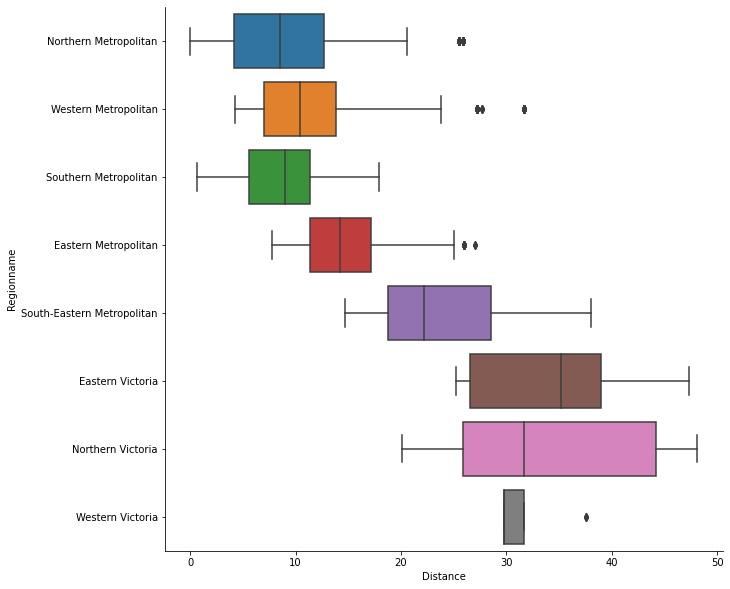

In [ ]:
# FIGURE 3
plt.figure(figsize=(10,10))
sns.boxplot(x='Distance', y='Regionname', data=dfv
            )
sns.despine()

In [ ]:
hold1 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Average Distance:" , dfv['Distance'].loc[dfv['Regionname'] == i].mean())
  hold1.append(dfv['Distance'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Average Distance: 14.684416767922238
Region name Eastern Victoria , Average Distance: 34.553714285714285
Region name Northern Metropolitan , Average Distance: 9.349993406303573
Region name Northern Victoria , Average Distance: 33.463793103448275
Region name South-Eastern Metropolitan , Average Distance: 24.393899782135072
Region name Southern Metropolitan , Average Distance: 8.857877374587645
Region name Western Metropolitan , Average Distance: 11.127437557816837
Region name Western Victoria , Average Distance: 30.851000000000003


In [ ]:
hold1 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Total:" , dfv['Distance'].loc[dfv['Regionname'] == i].count())
  hold1.append(dfv['Distance'].loc[dfv['Regionname'] == i].count())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Total: 3292
Region name Eastern Victoria , Total: 175
Region name Northern Metropolitan , Total: 7583
Region name Northern Victoria , Total: 174
Region name South-Eastern Metropolitan , Total: 1377
Region name Southern Metropolitan , Total: 8791
Region name Western Metropolitan , Total: 5405
Region name Western Victoria , Total: 100


**Figure 3**: region name and distance to CBD (km)

*   Figure 3 backed up the previous hypothesis
*   In the Metropolitan region, Northern Metropolitan has the least distance from CBD. Having one of the lowest house prices sold in the Metropolitan area plus with the short distance from nearest CBD, buying in this region should be taking into consider.
*   Outside the Metropolitan area, NOrthern Veronica has the shortest distance to CBD.





(0.0, 3000.0)

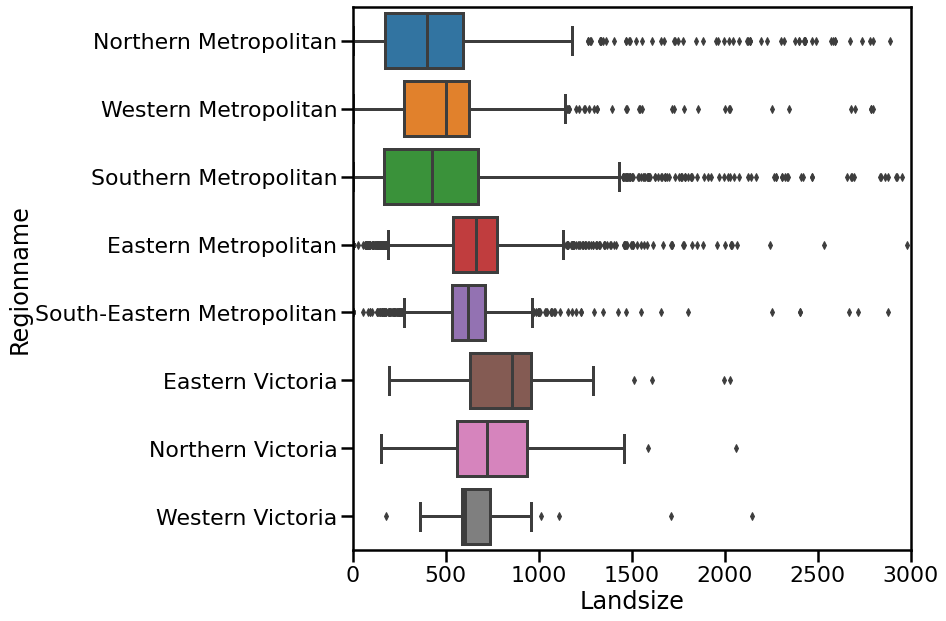

In [ ]:
# FIGURE 4
plt.figure(figsize=(10,10))

with sns.axes_style("whitegrid"):
  sns.set_context("poster")
  sns.despine()
img = sns.boxplot(x='Landsize', y='Regionname', data=dfv
            )
img.set_xlim(0, 3000)

In [ ]:
hold1 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Median Landsize:" , dfv['Landsize'].loc[dfv['Regionname'] == i].mean())
  hold1.append(dfv['Landsize'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Median Landsize: 672.5937215650591
Region name Eastern Victoria , Median Landsize: 2070.8899082568805
Region name Northern Metropolitan , Median Landsize: 462.9272691240587
Region name Northern Victoria , Median Landsize: 2991.9646017699115
Region name South-Eastern Metropolitan , Median Landsize: 657.6658566221142
Region name Southern Metropolitan , Median Landsize: 509.5429640973286
Region name Western Metropolitan , Median Landsize: 538.0837074201214
Region name Western Victoria , Median Landsize: 1152.4347826086957


**Figure 4**: region name and land size

*   Houses outside of the Metropolitan area have larger land size than houses in the Metropolitan area - Eastern Victoria and Northern Victoria are two regions with the largest land size
*   Three out of five regions in Metropolitan area have smaller land size compare to the houses outside Metropolitan, while the other two regions have almost the same land size as the houses outside the Metropolitan area
*   List item

***The hyphothesis that houses in metropolitan area have higher prices although having smaller land size is because the Metropolitan area is a strategic place to live.***





(0.0, 500.0)

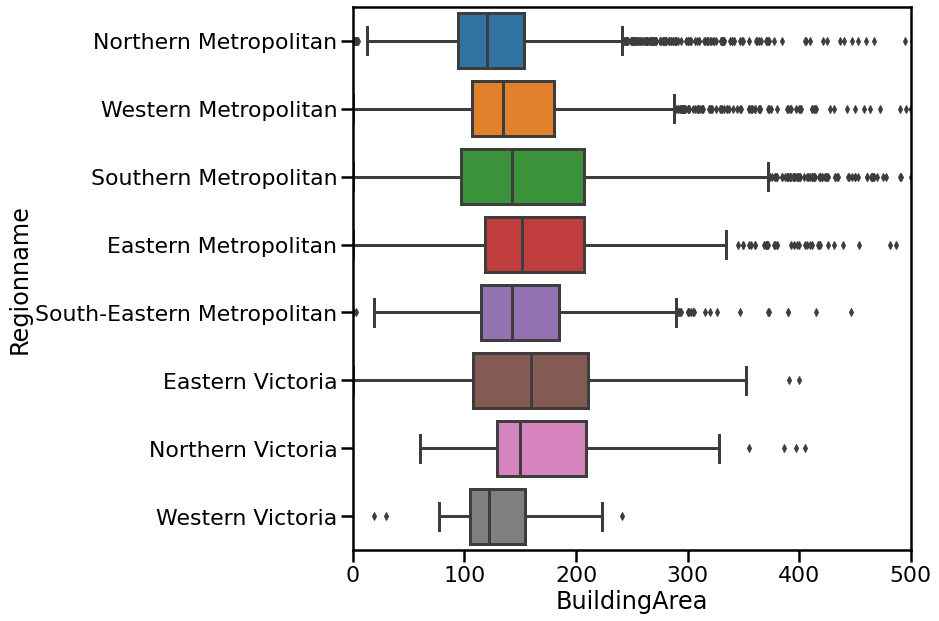

In [ ]:
# Figure 5
plt.figure(figsize=(10,10))

with sns.axes_style("whitegrid"):
  sns.set_context("poster")
  sns.despine()
img = sns.boxplot(x='BuildingArea', y='Regionname', data=dfv
            )
img.set_xlim(0, 500)

In [ ]:
hold2 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Average Building Area:" , dfv['BuildingArea'].loc[dfv['Regionname'] == i].mean())
  hold2.append(dfv['BuildingArea'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Average Building Area: 177.79802955665025
Region name Eastern Victoria , Average Building Area: 177.74740259740258
Region name Northern Metropolitan , Average Building Area: 132.8594047233905
Region name Northern Victoria , Average Building Area: 628.2126732673266
Region name South-Eastern Metropolitan , Average Building Area: 168.80435671641789
Region name Southern Metropolitan , Average Building Area: 164.0298363359708
Region name Western Metropolitan , Average Building Area: 152.04083873757025
Region name Western Victoria , Average Building Area: 130.34360655737706


**Figure 5**: region name and building area
*   Highest median value for building area is houses in region Eastern Metropolitan and Eastern Victoria, their average building area are also simillar.
*   Northern Victoria has the largest building area, with Northern Metropolitan with the smallest building area





In [ ]:
hold2 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Average Rooms:" , dfv['Rooms'].loc[dfv['Regionname'] == i].mean())
  hold2.append(dfv['Rooms'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Average Rooms: 3.3386998784933173
Region name Eastern Victoria , Average Rooms: 3.5485714285714285
Region name Northern Metropolitan , Average Rooms: 2.8228933139918237
Region name Northern Victoria , Average Rooms: 3.4942528735632186
Region name South-Eastern Metropolitan , Average Rooms: 3.242556281771968
Region name Southern Metropolitan , Average Rooms: 2.938459788419975
Region name Western Metropolitan , Average Rooms: 3.0825161887141537
Region name Western Victoria , Average Rooms: 3.31


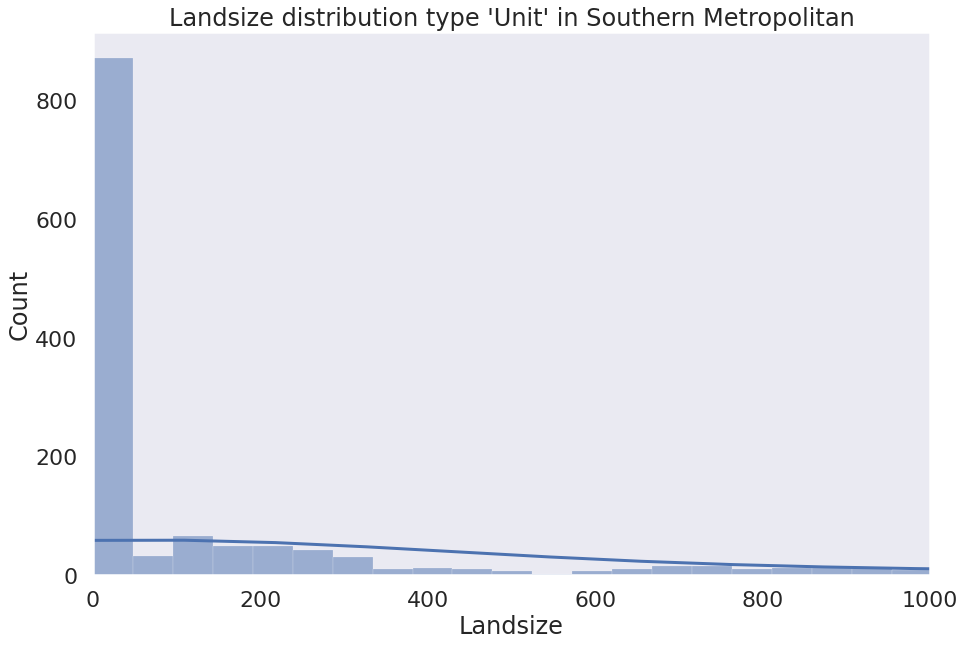

In [ ]:
# FIGURE 1A
plt.figure(figsize=(15,10))

# with sns.axes_style("whitegrid"):
#   sns.set_context("poster")
#   sns.despine()
img = sns.histplot(dfv.Landsize[(dfv['Regionname'] == 'Southern Metropolitan') & (dfv['Type'] == 'u')], kde=True)
img.set_xlim(0, 1000)
img.set_title("Landsize distribution type 'Unit' in Southern Metropolitan")
plt.grid()
plt.show()

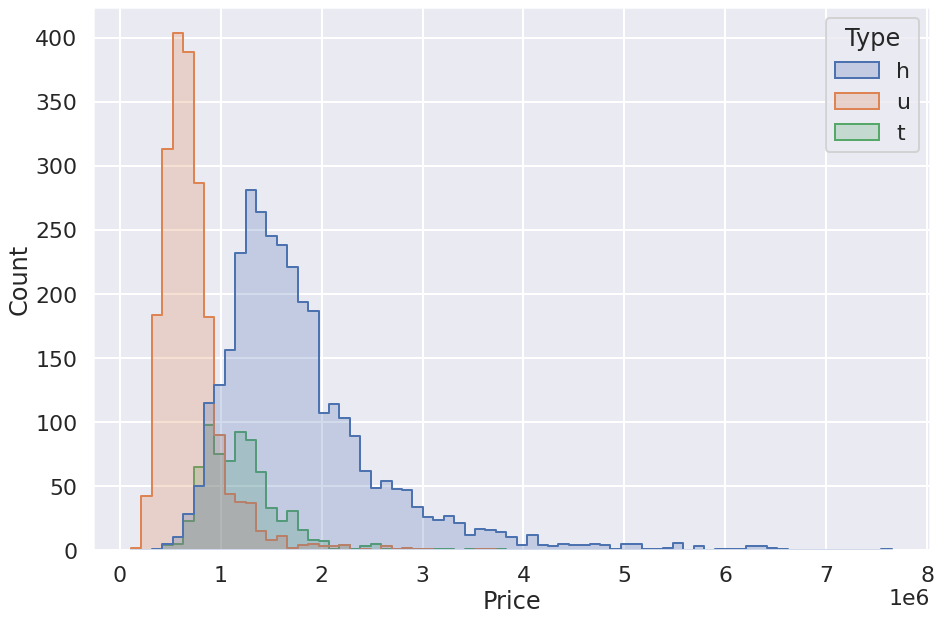

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Regionname'] == 'Southern Metropolitan'], x="Price", hue="Type", element="step")
# img.set_xlim(0, 2000)

(0.0, 2000.0)

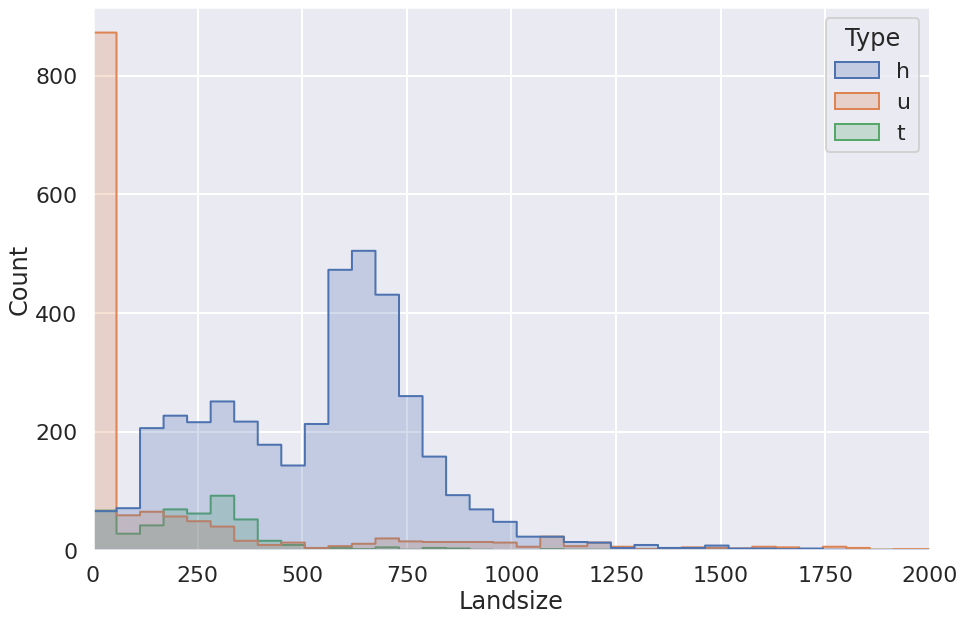

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Regionname'] == 'Southern Metropolitan'], x="Landsize", hue="Type", element="step")
img.set_xlim(0, 2000)

(0.0, 2000.0)

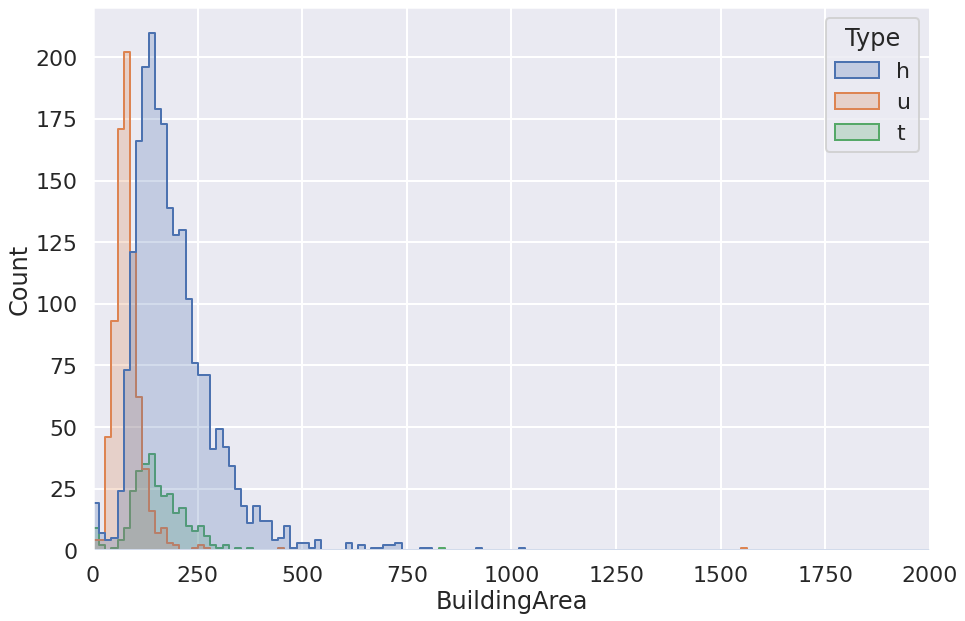

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Regionname'] == 'Southern Metropolitan'], x="BuildingArea", hue="Type", element="step")
img.set_xlim(0, 2000)

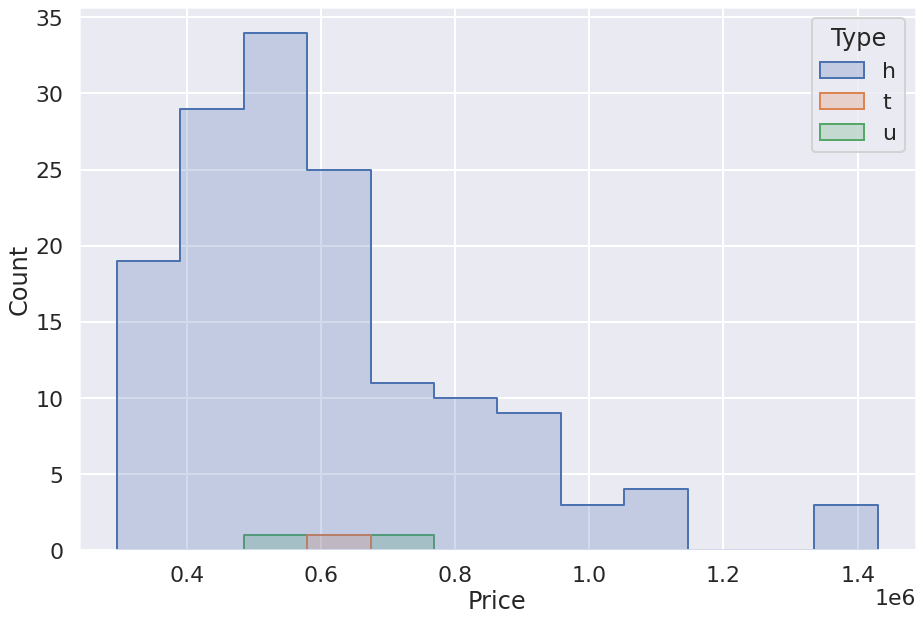

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Regionname'] == 'Northern Victoria'], x="Price", hue="Type", element="step")
# img.set_xlim(0, 3000)

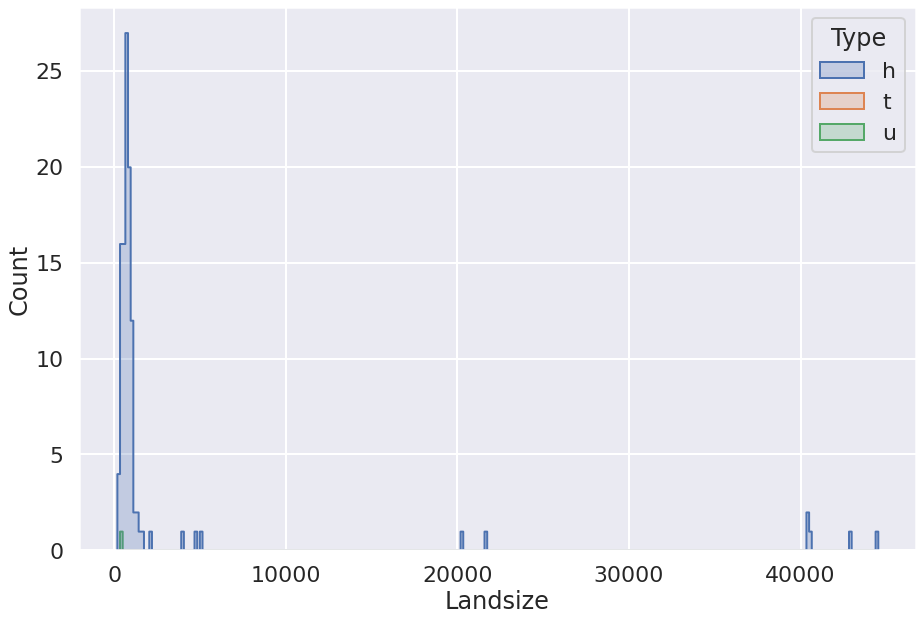

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Regionname'] == 'Northern Victoria'], x="Landsize", hue="Type", element="step")
# img.set_xlim(0, 3000)

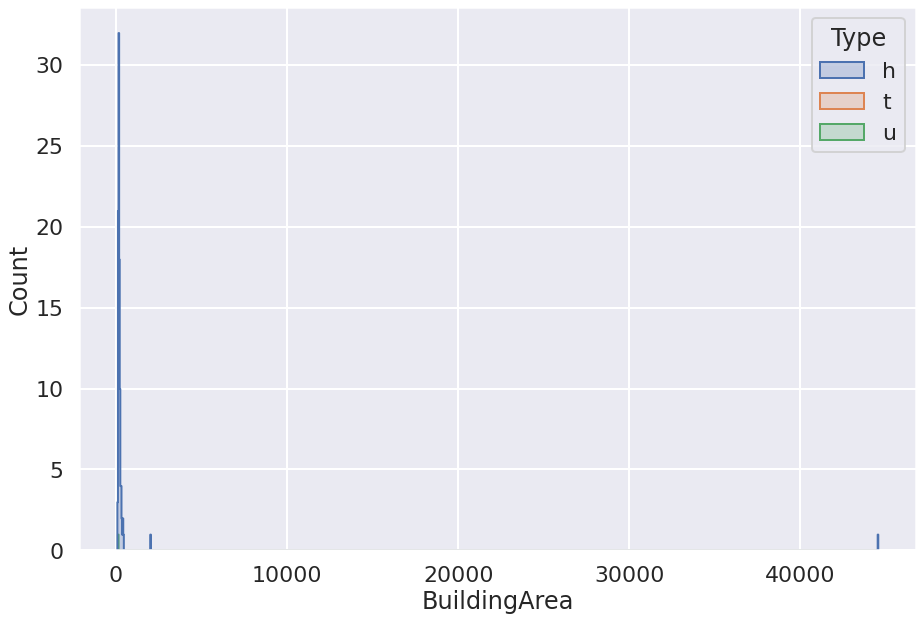

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Regionname'] == 'Northern Victoria'], x="BuildingArea", hue="Type", element="step")
# img.set_xlim(6000, 7000)

1. House prices by Method and Type looks comparable from the distribution box plot. But for detail, Type "unit" seems to have lower price than "house" and "town-house" across Methods.
2. Region Souther Metropolitan has the highest house prices out all regions (might want to buy house other than in Southern Metropolitan).

In [ ]:
hold2 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Average Building Area:" , dfv['BuildingArea'].loc[
          (dfv['Regionname'] == i) & (dfv['Type'] == 'u')].mean())
  hold2.append(dfv['BuildingArea'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Average Building Area: 109.4909090909091
Region name Eastern Victoria , Average Building Area: 102.0
Region name Northern Metropolitan , Average Building Area: 76.44907975460124
Region name Northern Victoria , Average Building Area: 120.0
Region name South-Eastern Metropolitan , Average Building Area: 93.38076923076923
Region name Southern Metropolitan , Average Building Area: 84.62382051282052
Region name Western Metropolitan , Average Building Area: 83.63836909871243
Region name Western Victoria , Average Building Area: nan


In [ ]:
hold2 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Average Land size:" , dfv['Landsize'].loc[
          (dfv['Regionname'] == i) & (dfv['Type'] == 'u')].mean())
  hold2.append(dfv['Landsize'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Average Land size: 323.6256983240223
Region name Eastern Victoria , Average Land size: 295.3333333333333
Region name Northern Metropolitan , Average Land size: 450.53351206434314
Region name Northern Victoria , Average Land size: 315.0
Region name South-Eastern Metropolitan , Average Land size: 325.32608695652175
Region name Southern Metropolitan , Average Land size: 454.3136582017845
Region name Western Metropolitan , Average Land size: 647.0322580645161
Region name Western Victoria , Average Land size: nan


In [ ]:
hold2 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Average Price:" , dfv['Price'].loc[
          (dfv['Regionname'] == i) & (dfv['Type'] == 'u')].mean())
  hold2.append(dfv['Price'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Average Price: 713564.2507122507
Region name Eastern Victoria , Average Price: 477200.0
Region name Northern Metropolitan , Average Price: 578222.2229885057
Region name Northern Victoria , Average Price: 614500.0
Region name South-Eastern Metropolitan , Average Price: 571411.5853658536
Region name Southern Metropolitan , Average Price: 706771.7449470644
Region name Western Metropolitan , Average Price: 517209.81603773584
Region name Western Victoria , Average Price: 285000.0


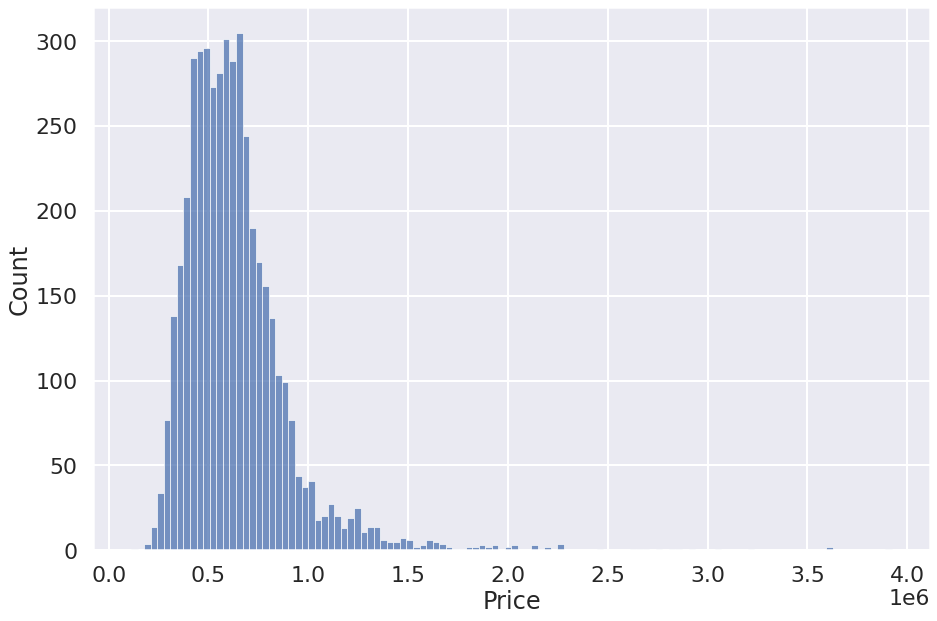

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Type'] == 'u'], x="Price")
# plt.grid()
# img.tick_params(rotation=45)
# img.set_xlim(0, 3000)

In [ ]:
hold2 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Average Distance to CBD:" , dfv['Distance'].loc[
          (dfv['Regionname'] == i) & (dfv['Type'] == 'u')].mean())
  hold2.append(dfv['Distance'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Average Distance to CBD: 13.757471264367819
Region name Eastern Victoria , Average Distance to CBD: 39.44
Region name Northern Metropolitan , Average Distance to CBD: 6.237690776376908
Region name Northern Victoria , Average Distance to CBD: 23.85
Region name South-Eastern Metropolitan , Average Distance to CBD: 23.75677083333333
Region name Southern Metropolitan , Average Distance to CBD: 7.457278601292284
Region name Western Metropolitan , Average Distance to CBD: 9.079574468085108
Region name Western Victoria , Average Distance to CBD: 29.8


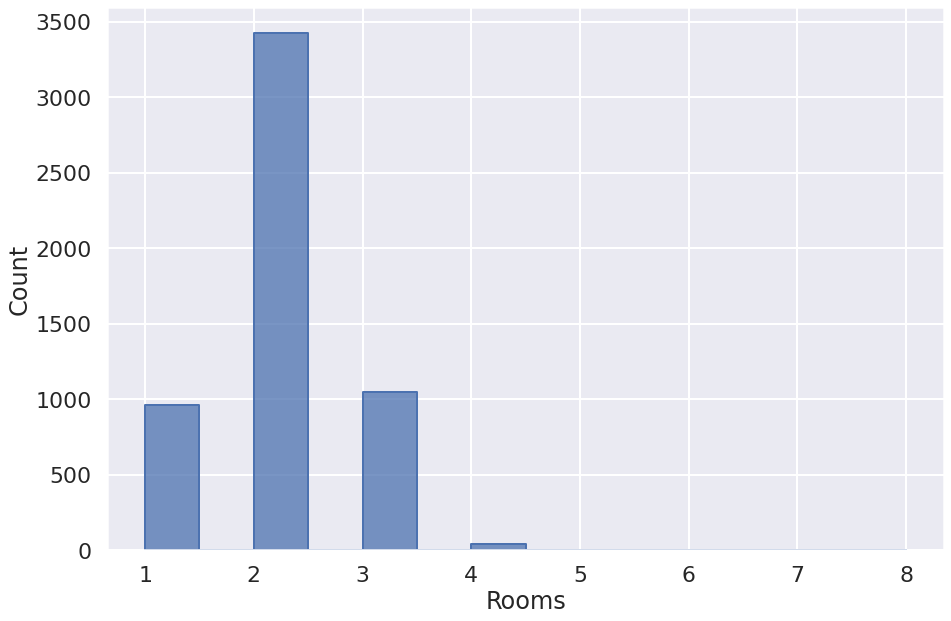

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Type'] == 'u'], x="Rooms", element="step")
# img.set_xlim(6000, 7000)

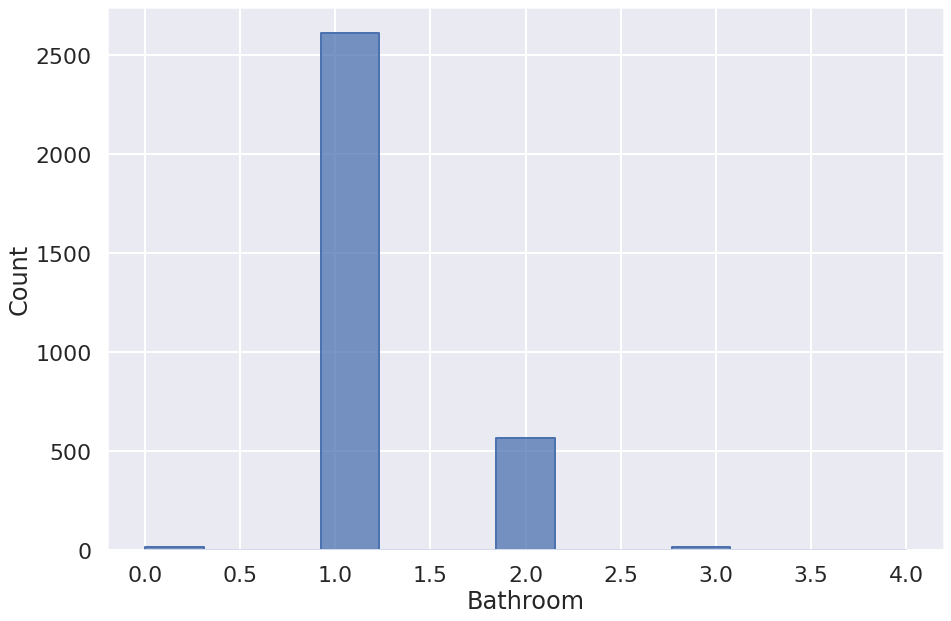

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Type'] == 'u'], x="Bathroom", element="step")
# img.set_xlim(6000, 7000)

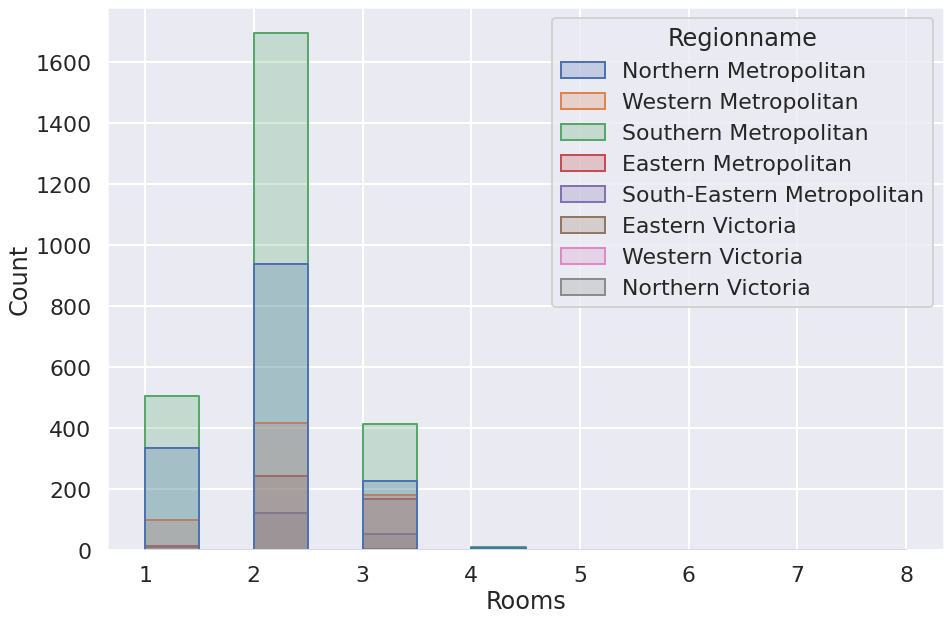

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Type'] == 'u'], x="Rooms", hue='Regionname', element="step")
# img.set_xlim(6000, 7000)

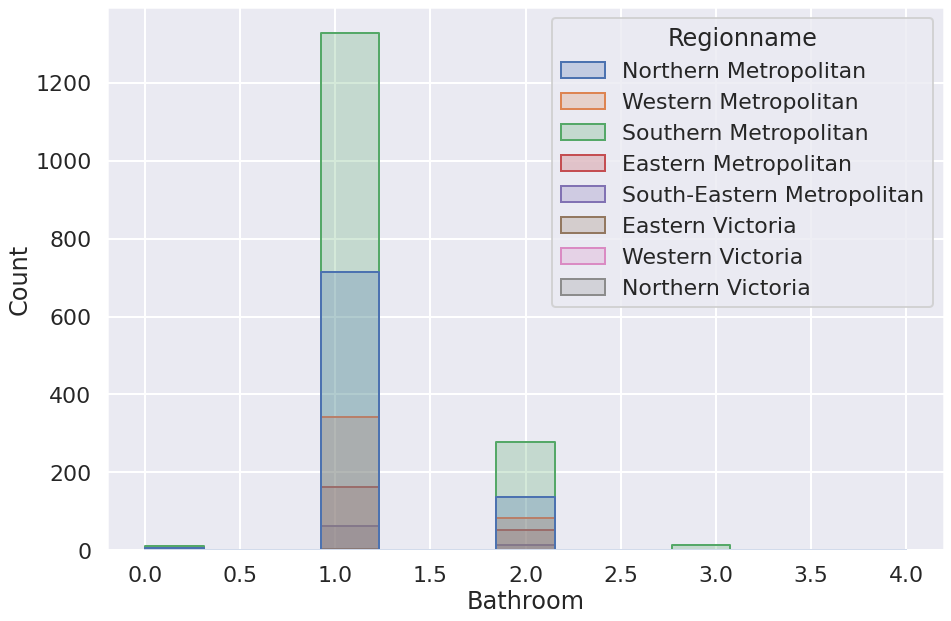

In [ ]:
plt.figure(figsize=(15,10))
img = sns.histplot(dfv[dfv['Type'] == 'u'], x="Bathroom", hue='Regionname', element="step")
# img.set_xlim(6000, 7000)

In [ ]:
hold2 = []
rg = sorted(dfv['Regionname'].dropna().unique())
print(rg)
for i in rg:
  print("Region name" , i
        , ", Average Rooms:" , dfv['Rooms'].loc[
          (dfv['Regionname'] == i) & (dfv['Type'] == 'u')].mean())
  hold2.append(dfv['Rooms'].loc[dfv['Regionname'] == i].mean())

['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']
Region name Eastern Metropolitan , Average Rooms: 2.3977011494252873
Region name Eastern Victoria , Average Rooms: 2.6
Region name Northern Metropolitan , Average Rooms: 1.9409422694094227
Region name Northern Victoria , Average Rooms: 2.5
Region name South-Eastern Metropolitan , Average Rooms: 2.3020833333333335
Region name Southern Metropolitan , Average Rooms: 1.9771949828962372
Region name Western Metropolitan , Average Rooms: 2.1390070921985815
Region name Western Victoria , Average Rooms: 2.0


In [ ]:
df['Date2'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df['Date3'] = df['Date2'].dt.strftime('%Y-%m-%d')

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date2,Date3
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,2016-03-09,2016-03-09
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,2016-03-12,2016-03-12
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016-04-02,2016-04-02
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,2016-04-02,2016-04-02
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017-04-03,2017-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,2018-02-24,2018-02-24
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2018-02-24,2018-02-24
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2018-02-24,2018-02-24
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,2018-02-24,2018-02-24


In [ ]:
df['WoY'] = df['Date2'].dt.weekofyear
df['MoY'] = df['Date2'].dt.month
df['Year'] = df['Date2'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df['Year'].unique()

array([2016, 2017, 2018])

In [ ]:
df_pricetime = df.groupby(['Year', 'MoY']).Price.mean()
df_pricetime

Year  MoY
2016  1      1.009000e+06
      3      1.175837e+06
      4      1.019294e+06
      5      1.037713e+06
      6      1.027206e+06
      7      9.809688e+05
      8      1.037344e+06
      9      1.028593e+06
      10     1.124598e+06
      11     1.159202e+06
      12     1.083740e+06
2017  1      9.136368e+05
      2      1.176877e+06
      3      1.083288e+06
      4      1.059979e+06
      5      1.131942e+06
      6      1.091816e+06
      7      8.761150e+05
      8      1.017826e+06
      9      1.039554e+06
      10     1.110624e+06
      11     1.048016e+06
      12     1.148212e+06
2018  1      7.607869e+05
      2      1.053868e+06
      3      1.081352e+06
      6      9.512821e+05
      10     7.975032e+05
Name: Price, dtype: float64

In [ ]:
year_month = pd.pivot_table(df, values='Price', index='Year', columns='MoY', aggfunc='mean')
year_month.head()

MoY,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,1.009000e+06,NaN,1.175837e+06,1.019294e+06,1.037713e+06,1.027206e+06,980968.797457,1.037344e+06,1.028593e+06,1.124598e+06,1.159202e+06,1.083740e+06
2017,9.136368e+05,1.176877e+06,1.083288e+06,1.059979e+06,1.131942e+06,1.091816e+06,876115.021332,1.017826e+06,1.039554e+06,1.110624e+06,1.048016e+06,1.148212e+06
2018,7.607869e+05,1.053868e+06,1.081352e+06,NaN,NaN,9.512821e+05,NaN,NaN,NaN,7.975032e+05,NaN,NaN


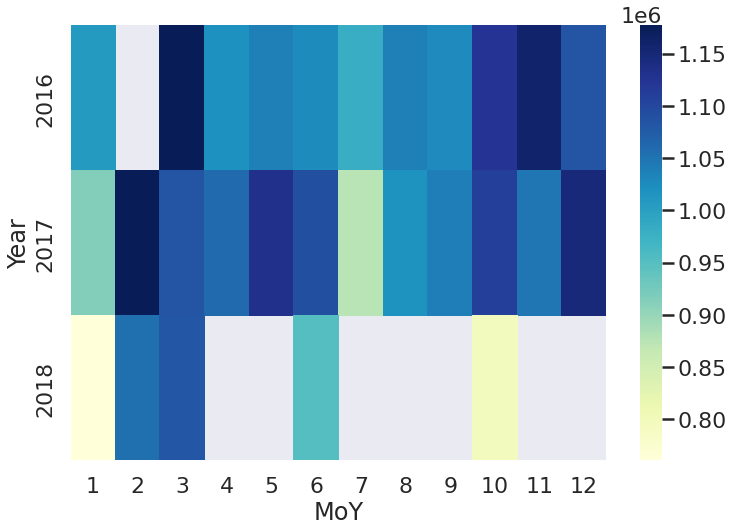

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(year_month, cmap="YlGnBu")
plt.show()

#here

In [ ]:
df_time_data = df.copy()
df_time_data.loc[df_time_data['Method'].isin(['VB', 'PI', 'W']), "Status"] = "not sold"
df_time_data.loc[~df_time_data['Method'].isin(['VB', 'PI', 'W']), "Status"] = "sold"
df_time_data.loc[df_time_data['Method'].isin(['VB', 'PI', 'W']), "Sold"] = "0"
df_time_data.loc[~df_time_data['Method'].isin(['VB', 'PI', 'W']), "Sold"] = "1"

In [ ]:
df_time_data['Status'].unique()

array(['sold', 'not sold'], dtype=object)

In [ ]:
df_time_data["list_year"] = [i.split(" ")[0][5:] for i in list(df_time_data['Date'])]
df_time_data["list_month"] = [i.split(" ")[0][0:1] for i in list(df_time_data['Date'])]
df_time_data["list_MoY"] = [i.split(" ")[0][3:] for i in list(df_time_data['Date'])]

In [ ]:
df_time_data["month_year"] = df_time_data["MoY"].map(str) + '/' + df_time_data["Year"].map(str)

In [ ]:
df_time_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date2,Date3,WoY,MoY,Year,Status,Sold,list_year,list_month,list_MoY,month_year
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,2016-03-09,2016-03-09,10,3,2016,sold,1,2016,3,9/2016,3/2016
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,2016-03-12,2016-03-12,10,3,2016,sold,1,2016,3,2/2016,3/2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016-04-02,2016-04-02,13,4,2016,sold,1,2016,4,2/2016,4/2016
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,2016-04-02,2016-04-02,13,4,2016,not sold,0,2016,4,2/2016,4/2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017-04-03,2017-04-03,14,4,2017,sold,1,2017,4,3/2017,4/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,2018-02-24,2018-02-24,8,2,2018,not sold,0,/2018,2,02/2018,2/2018
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2018-02-24,2018-02-24,8,2,2018,sold,1,/2018,2,02/2018,2/2018
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2018-02-24,2018-02-24,8,2,2018,sold,1,/2018,2,02/2018,2/2018
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,2018-02-24,2018-02-24,8,2,2018,sold,1,/2018,2,02/2018,2/2018


In [ ]:
df_monthly = df_time_data.groupby(['list_MoY','Year','MoY','Status']).count()
df_monthly = df_monthly['Sold'].reset_index()
df_monthly.sort_values('list_MoY')

,list_MoY,Year,MoY,Status,Sold
0,0/2016,2016,8,not sold,73
1,0/2016,2016,8,sold,313
2,0/2017,2017,7,not sold,148
3,0/2017,2017,7,sold,445
4,01/2016,2016,1,sold,3
...,...,...,...,...,...
99,9/2016,2016,3,not sold,63
102,9/2017,2017,3,sold,439
103,9/2017,2017,9,not sold,141
101,9/2017,2017,3,not sold,128


In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x ='list_MoY', y = 'PM2.5',
                  hue='District', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('PM2.5 (µg/m3)')
plt.xlabel('Year-Month')
plt.show()

ValueError: ignored

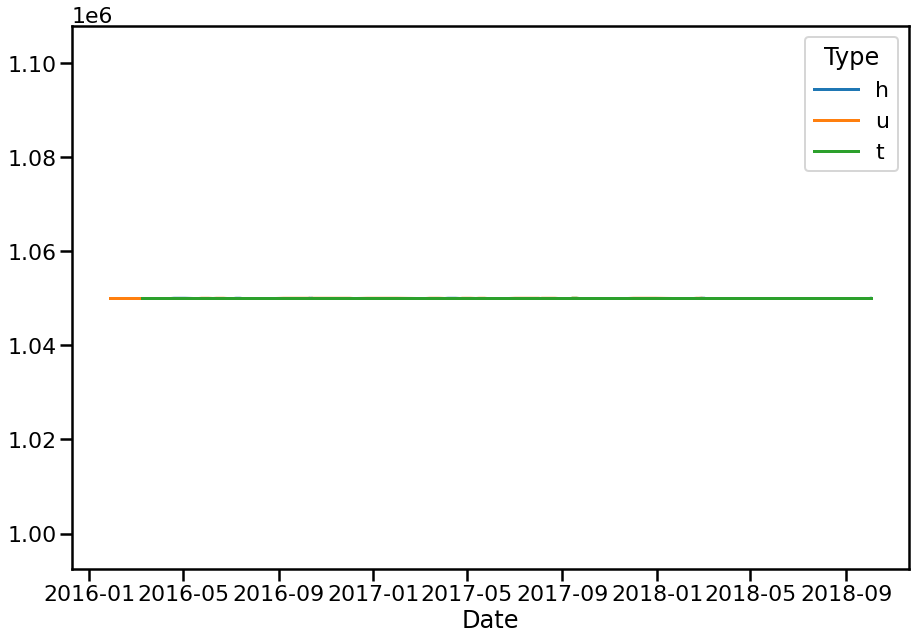

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Date", y=df["Price"].mean(),
             hue="Type",
             data=df_time_data)

# DATA PREPROCESSING/SCRUBBING/CLEANING

## Delete unrelevant features prior to modelling

In [ ]:
df2 = df.copy()
del df2['Address']
del df2['Date']
del df2['SellerG']
del df2['Method']
del df2['Postcode']
del df2['Regionname']
del df2['Propertycount']
del df2['Lattitude']
del df2['Longtitude']

In [ ]:
df2.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,Abbotsford,2,h,NaN,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council
1,Abbotsford,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council
2,Abbotsford,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council
3,Abbotsford,3,u,NaN,2.5,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council
4,Abbotsford,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council


## Handling missing values

In [ ]:
# Check total rows with missing values in columns
df2.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Distance            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
YearBuilt       19306
CouncilArea         3
dtype: int64

In [ ]:
# check missing values percentage in each columns
for col in df2.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * 
          (df2[col].isnull().sum() / df2[col].shape[0]))
    print(msg)

column:     Suburb	 percent of NaN value: 0.00%
column:      Rooms	 percent of NaN value: 0.00%
column:       Type	 percent of NaN value: 0.00%
column:      Price	 percent of NaN value: 21.83%
column:   Distance	 percent of NaN value: 0.00%
column:   Bedroom2	 percent of NaN value: 23.57%
column:   Bathroom	 percent of NaN value: 23.60%
column:        Car	 percent of NaN value: 25.04%
column:   Landsize	 percent of NaN value: 33.88%
column: BuildingArea	 percent of NaN value: 60.58%
column:  YearBuilt	 percent of NaN value: 55.39%
column: CouncilArea	 percent of NaN value: 0.01%


For columns that have missing values % below 5%, rows in the columns containing the missing values will be deleted. Conversly, different method will be applied.

**Rows that contain missing value in column CouncilArea will be deleted**

In [ ]:
# Check data shape before
df2.shape

(34857, 12)

In [ ]:
index = df2.index[df2['CouncilArea'].isnull()]
df2.drop(index, inplace=True)

In [ ]:
for col in df2.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}% '.format(col, 100 * 
          (df2[col].isnull().sum() / df2[col].shape[0]))
    print(msg)

column:     Suburb	 percent of NaN value: 0.00% 
column:      Rooms	 percent of NaN value: 0.00% 
column:       Type	 percent of NaN value: 0.00% 
column:      Price	 percent of NaN value: 21.83% 
column:   Distance	 percent of NaN value: 0.00% 
column:   Bedroom2	 percent of NaN value: 23.57% 
column:   Bathroom	 percent of NaN value: 23.59% 
column:        Car	 percent of NaN value: 25.03% 
column:   Landsize	 percent of NaN value: 33.88% 
column: BuildingArea	 percent of NaN value: 60.57% 
column:  YearBuilt	 percent of NaN value: 55.38% 
column: CouncilArea	 percent of NaN value: 0.00% 


In [ ]:
# check data shape after removing missing values
df2.shape

(34854, 12)

In [ ]:
# Fill categorical type features that have missing values with mode value
cat_columns = ['Suburb', 'Type', 'CouncilArea']

for column in cat_columns:
    df2.loc[df2[column].isnull(), column] = str(df2[column].mode())

In [ ]:
# Fill numerical type features that have missing values with median value
num_columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
               'BuildingArea', 'YearBuilt', 'Price']

for column in num_columns:
  df2.loc[df2[column].isnull(), column] = int(df2[column].mean())              

In [ ]:
for col in df2.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}% '.format(col, 100 * 
          (df2[col].isnull().sum() / df2[col].shape[0]))
    print(msg)

column:     Suburb	 percent of NaN value: 0.00% 
column:      Rooms	 percent of NaN value: 0.00% 
column:       Type	 percent of NaN value: 0.00% 
column:      Price	 percent of NaN value: 0.00% 
column:   Distance	 percent of NaN value: 0.00% 
column:   Bedroom2	 percent of NaN value: 0.00% 
column:   Bathroom	 percent of NaN value: 0.00% 
column:        Car	 percent of NaN value: 0.00% 
column:   Landsize	 percent of NaN value: 0.00% 
column: BuildingArea	 percent of NaN value: 0.00% 
column:  YearBuilt	 percent of NaN value: 0.00% 
column: CouncilArea	 percent of NaN value: 0.00% 


## Conduct one-hot encoding for categorical type features

In [ ]:
# df3 = pd.get_dummies(df2, columns = ['Type'])

In [ ]:
# df3

## Label Encoding

In [ ]:
df3 = df2.copy()
df3['Suburb'] = df3['Suburb'].astype('category').cat.codes
df3['CouncilArea'] = df3['CouncilArea'].astype('category').cat.codes
df3['Type'] = df3['Type'].astype('category').cat.codes

In [ ]:
df3

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,0,2,0,1050210.0,2.5,2.0,1.0,1.0,126.0,160.0,1965.0,31
1,0,2,0,1480000.0,2.5,2.0,1.0,1.0,202.0,160.0,1965.0,31
2,0,2,0,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,31
3,0,3,2,1050210.0,2.5,3.0,2.0,1.0,0.0,160.0,1965.0,31
4,0,3,0,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,0,1480000.0,6.3,4.0,1.0,3.0,593.0,160.0,1965.0,16
34853,347,2,0,888000.0,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,16
34854,347,2,1,705000.0,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,16
34855,347,3,0,1140000.0,6.3,3.0,1.0,1.0,593.0,160.0,1965.0,16


## Check Multicollinearity

In [ ]:
# the independent variables set
X = df3[['BuildingArea', 'Landsize','Rooms', 'Distance', 'Bedroom2', 'Bathroom', 
       'Car', 'Suburb', 'YearBuilt', 'CouncilArea', 'Type']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)


         feature        VIF
0   BuildingArea   1.434666
1       Landsize   1.056604
2          Rooms  41.145228
3       Distance   4.212470
4       Bedroom2  47.471768
5       Bathroom   9.215887
6            Car   4.854444
7         Suburb   3.980663
8      YearBuilt  29.836629
9    CouncilArea   3.008116
10          Type   2.122296


In [ ]:
df4 = df3.drop(['YearBuilt'], axis=1, inplace=False)

In [ ]:
df4.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea
0,0,2,0,1050210.0,2.5,2.0,1.0,1.0,126.0,160.0,31
1,0,2,0,1480000.0,2.5,2.0,1.0,1.0,202.0,160.0,31
2,0,2,0,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,31
3,0,3,2,1050210.0,2.5,3.0,2.0,1.0,0.0,160.0,31
4,0,3,0,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,31


## Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df4['Distance'] = MinMaxScaler().fit_transform(df4['Distance'].values.reshape(len(df4), 1))
df4['Suburb'] = MinMaxScaler().fit_transform(df4['Suburb'].values.reshape(len(df4), 1))
df4['Rooms'] = MinMaxScaler().fit_transform(df4['Rooms'].values.reshape(len(df4), 1))
df4['Type'] = MinMaxScaler().fit_transform(df4['Type'].values.reshape(len(df4), 1))
df4['Bedroom2'] = MinMaxScaler().fit_transform(df4['Bedroom2'].values.reshape(len(df4), 1))
df4['Bathroom'] = MinMaxScaler().fit_transform(df4['Bathroom'].values.reshape(len(df4), 1))
df4['Car'] = MinMaxScaler().fit_transform(df4['Car'].values.reshape(len(df4), 1))
df4['Landsize'] = MinMaxScaler().fit_transform(df4['Landsize'].values.reshape(len(df4), 1))
df4['BuildingArea'] = MinMaxScaler().fit_transform(df4['BuildingArea'].values.reshape(len(df4), 1))
df4['CouncilArea'] = MinMaxScaler().fit_transform(df4['CouncilArea'].values.reshape(len(df4), 1))

In [ ]:
df4.sample()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea
10808,0.977077,0.133333,0.0,1050210.0,0.106029,0.1,0.166667,0.038462,0.00043,0.003594,0.8125


## Separate Independent and Dependent variables

In [ ]:
del df4['Price']
X = df4.values
y = df2['Price'].values

## Split data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(random_state=42, k_neighbors=10, sampling_strategy='majority')
# X_over, y_over = oversample.fit_resample(X_train, y_train)

# MODEL

In [ ]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.6,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features=0.8,
    loss='absolute_error'
)

In [ ]:
# param_grid = {
#     'n_estimators':[300, 400, 500], 
#     'learning_rate':[0.001, 0.002, 0.6, 0.7]
    # 'max_depth':[7,9,11], 7
    # 'min_samples_split':[3,4,5], 5
    # 'min_samples_leaf':[5,6,7],
    # 'max_features':[0.8,0.9],
    # 'loss':['ls', 'absolute_error', 'huber']
# }

SyntaxError: ignored

In [ ]:
# gs_cv = GridSearchCV(model, param_grid, n_jobs=4)

NameError: ignored

In [ ]:
# gs_cv.fit(X_train, y_train)

NameError: ignored

In [ ]:
# print(gs_cv.best_params_)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.6, loss='absolute_error', max_depth=7,
                          max_features=0.8, min_samples_leaf=5,
                          min_samples_split=5, n_estimators=300)

In [ ]:
# joblib.dump(model, 'house_trained_model.pkl')

['house_trained_model.pkl']

# EVALUATE

In [ ]:
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set MAE: %.2f" % mae)
# 192077.77

Training Set MAE: 191874.02


In [ ]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Testing Set MAE: %.2f" % mae)
# 240257.06

Testing Set MAE: 240505.63


# REFERENCES

*   https://www.realestate.com.au/advice/auction-hammer-falls-vendor-bid/#:~:text=What%20is%20a%20vendor%20bid,keep%20the%20bidding%20moving%20forward.
*   https://www.greghocking.com.au/what-happens-if-a-property-is-passed-in-at-auction/#:~:text=When%20a%20property%20is%20passed,crowd%20or%20a%20vendor%20bid.
*   https://www.therealestateconversation.com.au/blog/justin-nickerson/why-would-you-sell-property-prior-auction/justin-nickerson-auctioneer/justin#:~:text=Selling%20prior%20to%20auction%20usually,types%20of%20offers%20before%20auction.
*   https://www.eigpropertyauctions.co.uk/information/glossary#:~:text=Buying%20After%20Auction,generally%20disclose%20the%20reserve%20price
*   https://www.lawinsider.com/dictionary/sold-property#:~:text=More%20Definitions%20of%20Sold%20Property&text=Sold%20Property%20means%20any%20real,Property%20prior%20to%20the%20Closing.
*   List item